In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# Set the default colormap to 'gray' and interpolation to 'none'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'

import numpy as np
import os

In [5]:
# function for displaying 2 images side by side 
def montage(im1, im2, title1='Original Image', title2='Enhanced Image'):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Show original image
    ax[0].imshow(im1, interpolation='none', cmap='gray', vmin=np.min(img), vmax=np.max(img))
    ax[0].set_title(title1)
    ax[0].axis('off')  # Turn off axis numbers
    
    # Show enhanced image
    ax[1].imshow(im2, interpolation='none', cmap='gray')
    ax[1].set_title(title2)
    ax[1].axis('off')  # Turn off axis numbers
    
    plt.show()


### Original Image

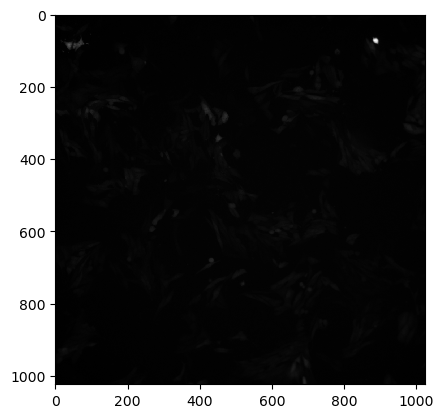

In [9]:
folder = '/Volumes/Luffy/2018-19 DH 630 plates/helix-20190111---Use Current State--20190112-091109_Plate_1197/TimePoint_1'
os.chdir(folder)

file = '/Volumes/Luffy/2018-19 DH 630 plates/helix-20181214---Use Current State--20181214-190838_Plate_847/TimePoint_1/helix-20181214---Use Current State--20181214-190838_A18_w3.TIF'

# Read in & show original image
img = plt.imread(file)
plt.figure()
plt.imshow(img, interpolation='none', cmap='gray')
plt.show()

Data type of image: uint16
Dimensions: (1024, 1024)


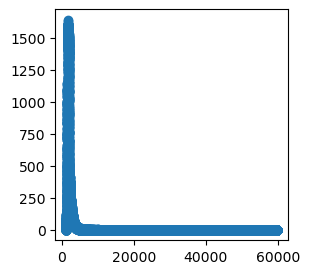

In [10]:
from skimage.exposure import histogram

# compute histogram in Red channel of cat image
(counts, bins) = histogram(img)
# view histogram
fig = plt.figure(figsize=(3,3))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(bins,counts)
print( "Data type of image:", img.dtype)
print('Dimensions:', img.shape)


### Rescale Intensity
tried to apply intensity rescaling but this didn't work bc the values are already stretched out due to the bright spot in the image --> so tried it on an img w/o bright spot artifact

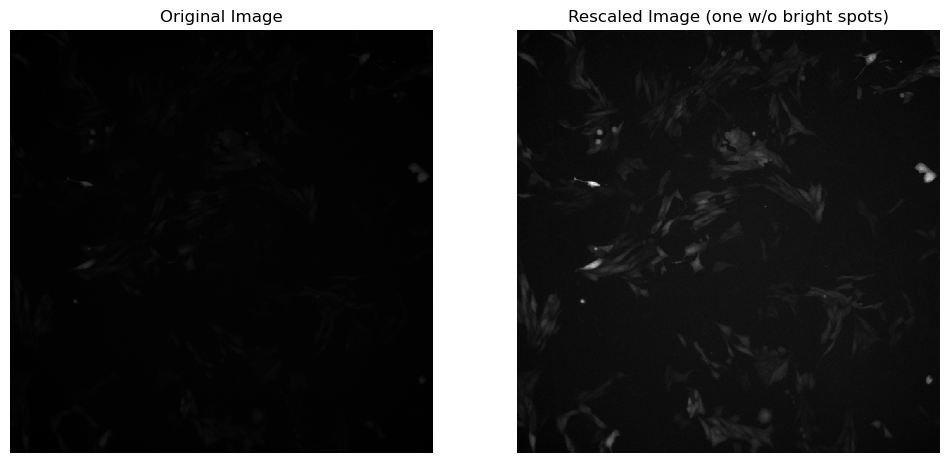

In [11]:
# trying rescale intensity on an image w/o a bright spot
from skimage.exposure import rescale_intensity
# print(os.getcwd())
img2 = plt.imread('/Volumes/Luffy/2018-19 DH 630 plates/helix-20181214---Use Current State--20181214-190838_Plate_847/TimePoint_1/helix-20181214---Use Current State--20181214-190838_A03_w3.TIF')
img_rescaled = rescale_intensity(img2)
montage(img2,img_rescaled,title2='Rescaled Image (one w/o bright spots)')

### Gaussian Blur

Text(0.5, 1.0, 'Gaussian Blur')

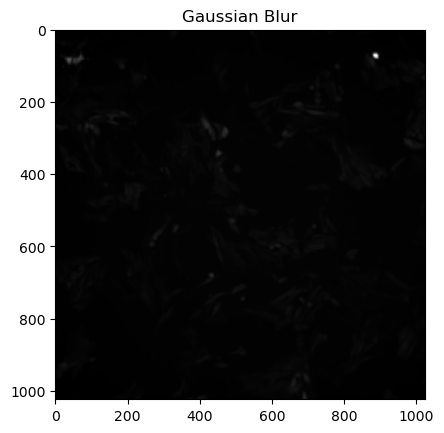

In [16]:
# apply gaussian blur
import scipy.ndimage as ndi
# higher sigma → more smoothing
sigma = 2
# Apply the filter and allocate the output to a new variable.
img_smooth = ndi.gaussian_filter(img, sigma)
plt.imshow(img_smooth, interpolation='none', cmap='gray')
plt.title('Gaussian Blur')

### Equalize Histogram
Stretch out max & min vals from smallest to largest possible intensity & move pixel vals around so that they occupy ~every possible val across the range w/o altering relative intensities (maximizing global contrast)

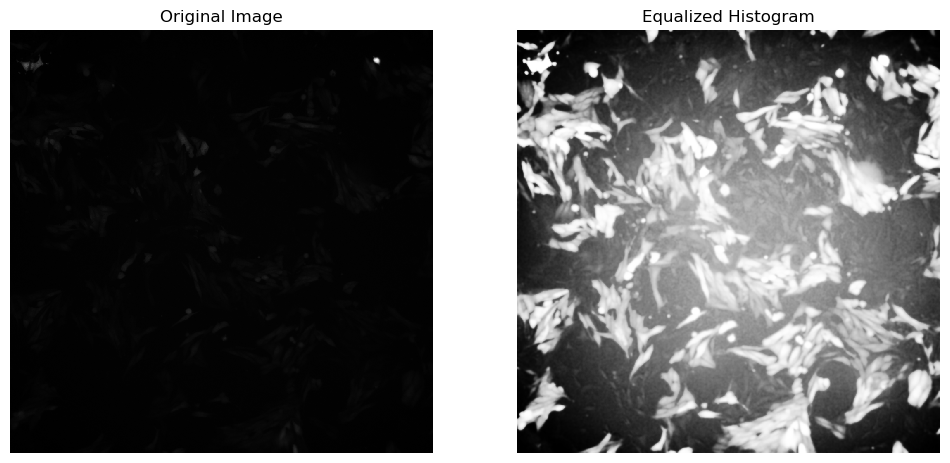

In [17]:
from skimage.exposure import equalize_hist
# adjust image contrast by equalizing the histogram
img_equalized = equalize_hist(img_smooth)

montage(img, img_equalized, title2='Equalized Histogram')


### Equalize Adaptive Histogram
 more robust alternative to equalize_hist. Spreads out pixel intensity evenly across range & remaps to smooth out hist, but it does this within context of pixel’s local neighborhood only→ useful for imgs with strong global contrasts bw light/darks across entire image, but minimal local contrasts bw lights/darks.
 [Default neighborhoods: ⅛ x ⅛ of image→ can be changed using kernel_size argument to desired pixel val of neighborhood]

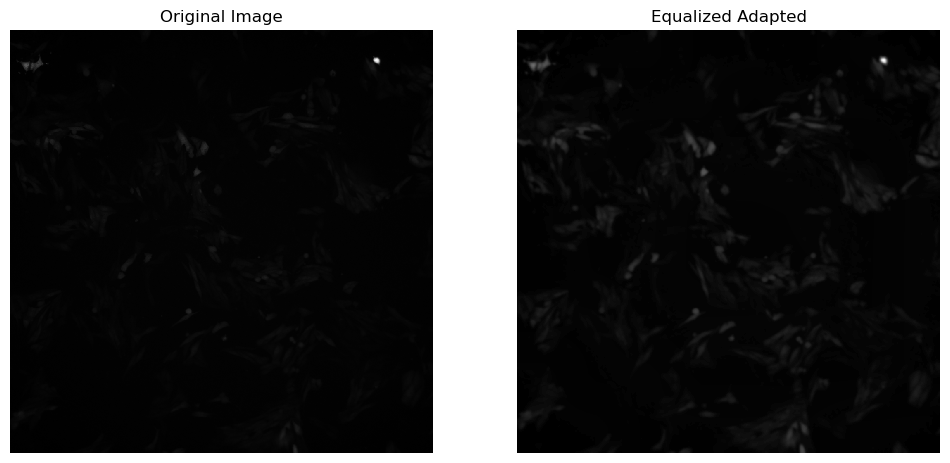

In [19]:
from skimage.exposure import equalize_adapthist

# adjust image contrast by adaptively equalizing the histogram
img_equalized_adapted = equalize_adapthist(img_smooth, kernel_size=None)
montage(img, img_equalized_adapted, title2 = 'Equalized Adapted')

### Pillow Contrast Enhancement

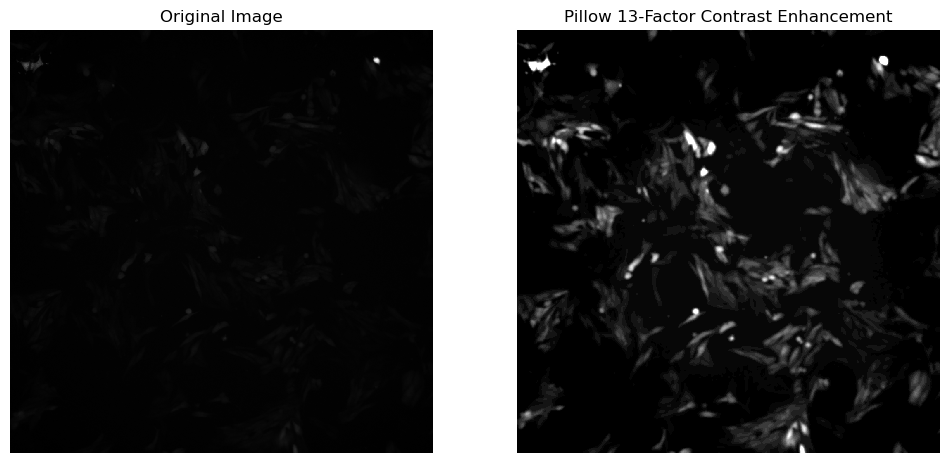

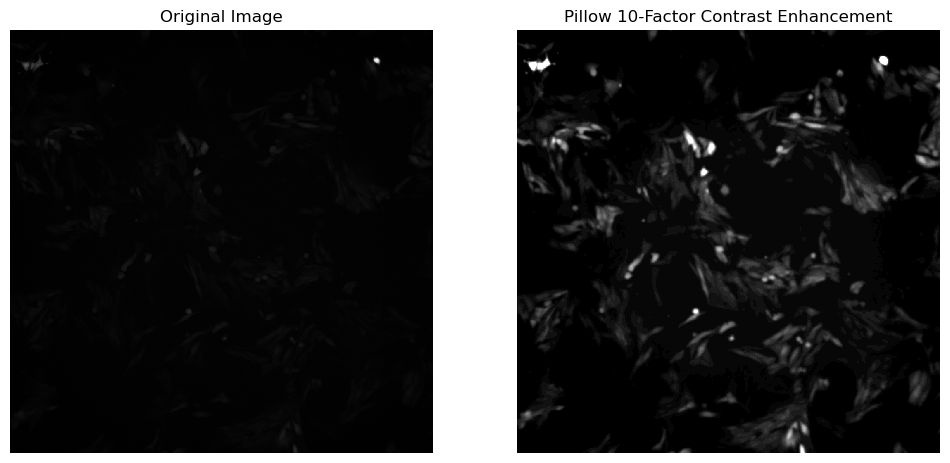

In [28]:
from PIL import Image, ImageEnhance
# Step 2: Convert the NumPy array to a PIL Image

pil_image = Image.fromarray(img_smooth)
# Convert to numpy array to check data
np_image = np.array(pil_image)

# Check if the image is 16-bit or HDR and rescale if necessary
if np_image.dtype == np.uint16: # this is the case
    # Rescale to 8-bit
    np_image = (np_image / 65535 * 255).astype('uint8')
    pil_image = Image.fromarray(np_image)

# If the image data range is 0-1, rescale to 0-255
if np_image.dtype == np.float32 or np_image.dtype == np.float64:
    np_image = (np_image * 255).astype('uint8')
    pil_image = Image.fromarray(np_image)

# Now convert to grayscale 'L' mode
pil_image = pil_image.convert('L')

# pil_image.show()

# Step 3: Apply the contrast enhancement
cont_img = ImageEnhance.Contrast(pil_image)
enhanced_im = cont_img.enhance(13)  

# Optional Step 4: Convert the PIL Image back to a NumPy array if needed
enhanced_np_image = np.array(enhanced_im)

# Now you can display the enhanced image using plt.imshow
montage(img, enhanced_np_image, title2='Pillow 13-Factor Contrast Enhancement')

enhanced_im2 = cont_img.enhance(10)
enhanced_np_image2 = np.array(enhanced_im2)
montage(img, enhanced_np_image2, title2='Pillow 10-Factor Contrast Enhancement')

**Pillow Contrast Enhancement**
Trying it on an image w/o bright spot (one that rescaling intensity worked well on)

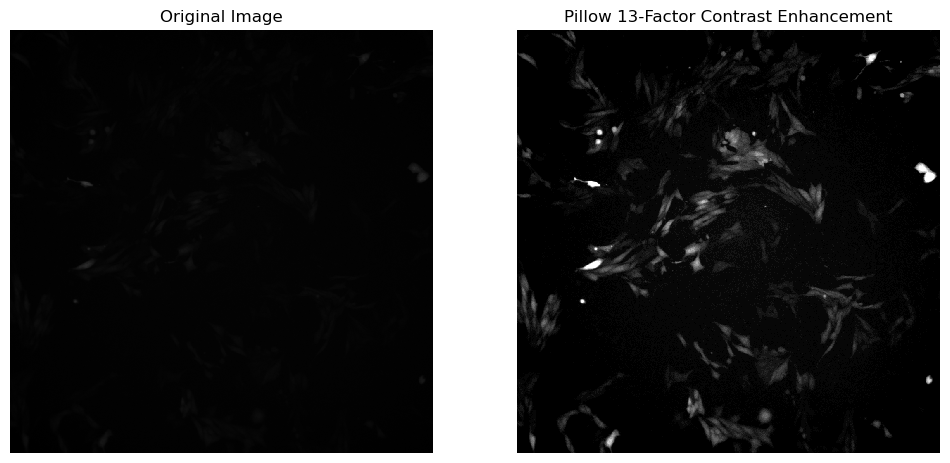

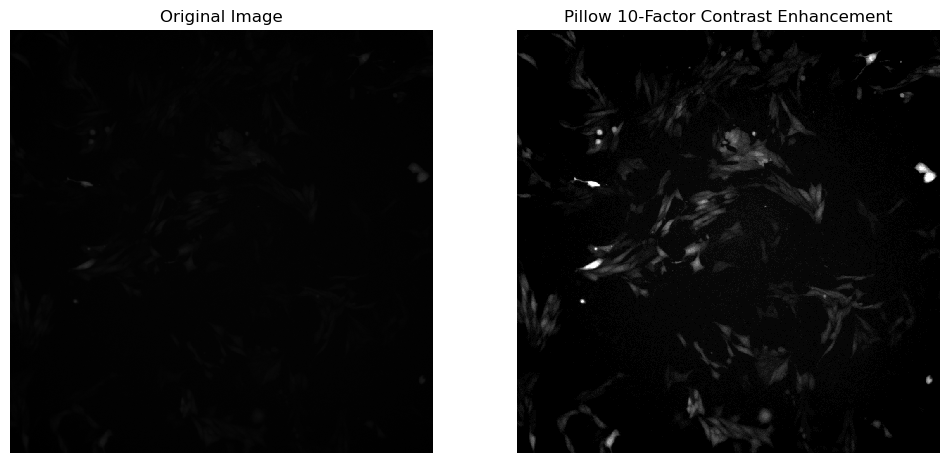

In [30]:
pil_image3 = Image.fromarray(img2)

# Convert to numpy array to check data
np_image3 = np.array(pil_image3)

# Rescale to 8-bit
np_image3 = (np_image3 / 65535 * 255).astype('uint8')
pil_image3 = Image.fromarray(np_image3)
# pil_image3.show()
# convert to grayscale 'L' mode
pil_image3 = pil_image3.convert('L')

# Step 3: Apply the contrast enhancement
cont_img = ImageEnhance.Contrast(pil_image3)
enhanced_im = cont_img.enhance(13)

# Optional Step 4: Convert the PIL Image back to a NumPy array if needed
enhanced_np_image = np.array(enhanced_im)

# display the enhanced image 
montage(img2, enhanced_np_image, title2='Pillow 13-Factor Contrast Enhancement')

enhanced_im2 = cont_img.enhance(10)
enhanced_np_image2 = np.array(enhanced_im2)
montage(img2, enhanced_np_image2, title2='Pillow 10-Factor Contrast Enhancement')